<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/model_selection/02_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walidacja krzyżowa / sprawdzian krzyżowy

Często wykorzystywane narzędzie, modele naley trenować na zbiorze treningowym. Walidacja krzyżowa polega na podziale zbioru treningowego na mniejsze czesci. Model wytrenowy na pojedynczych mniejszych tresciach jest walidowany na 1 - pojedynczym (wszystko zostaje w zbiorze treningowym). Wyniki uśredniamy. Oceniamy na innym zbiorze, zbiorze walidayjnym nie testowym! Dopiero po dopasowaniu wszystkiego oceniamy to na zbiorze testowym.


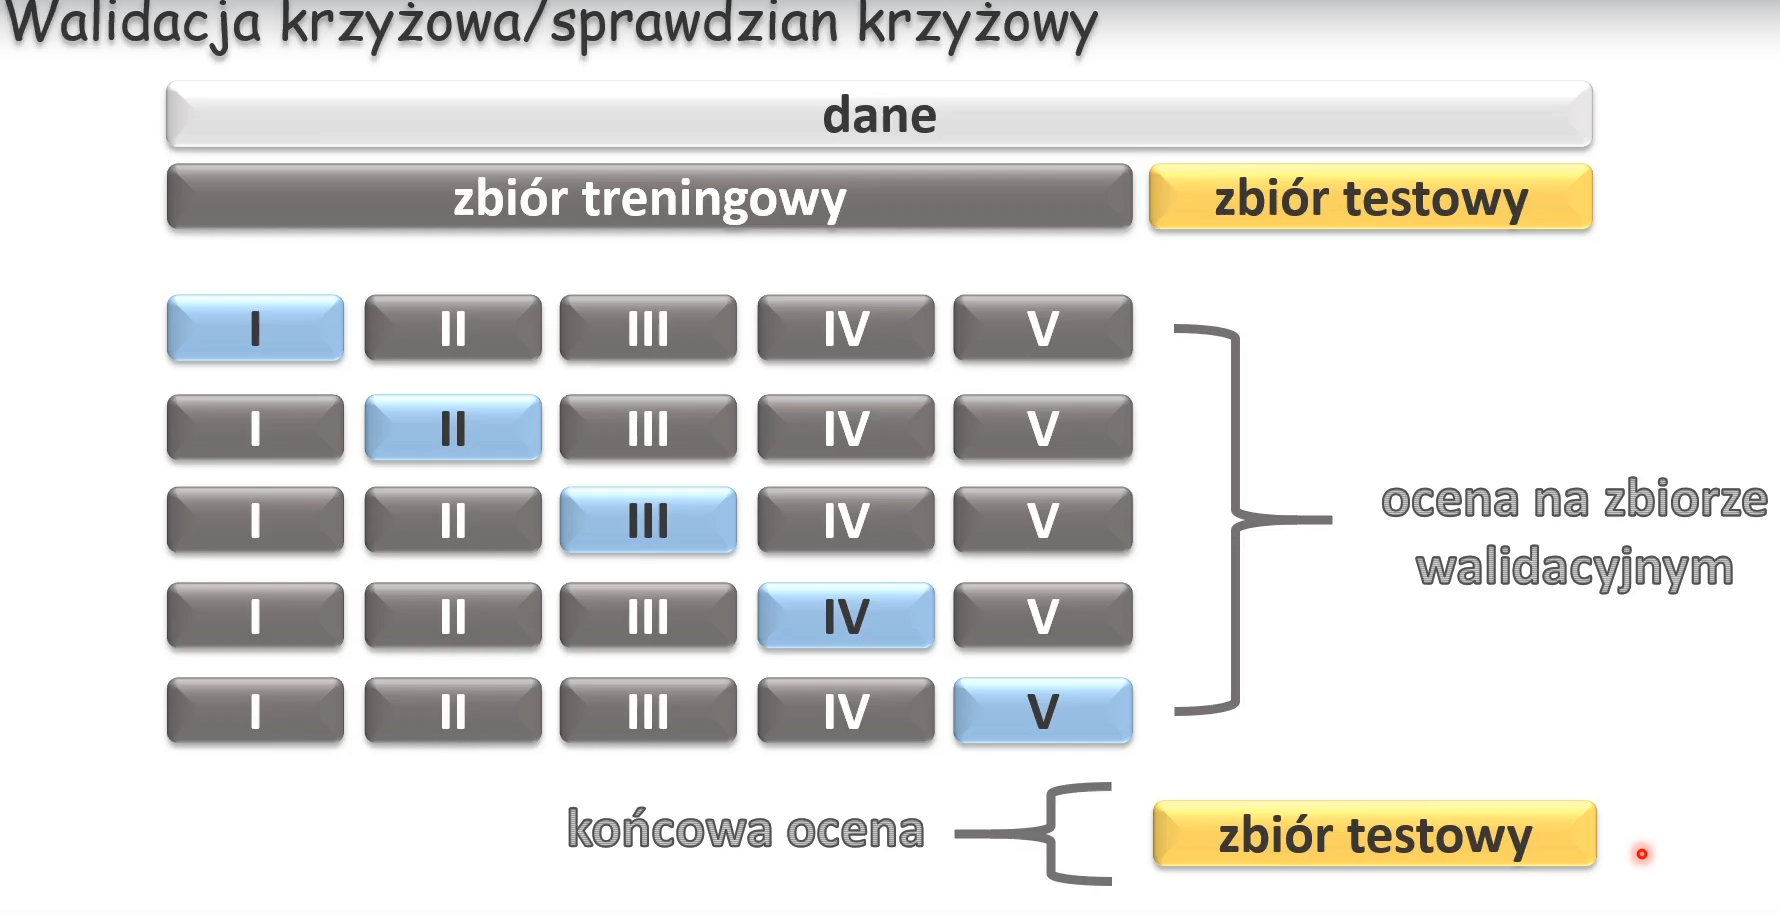

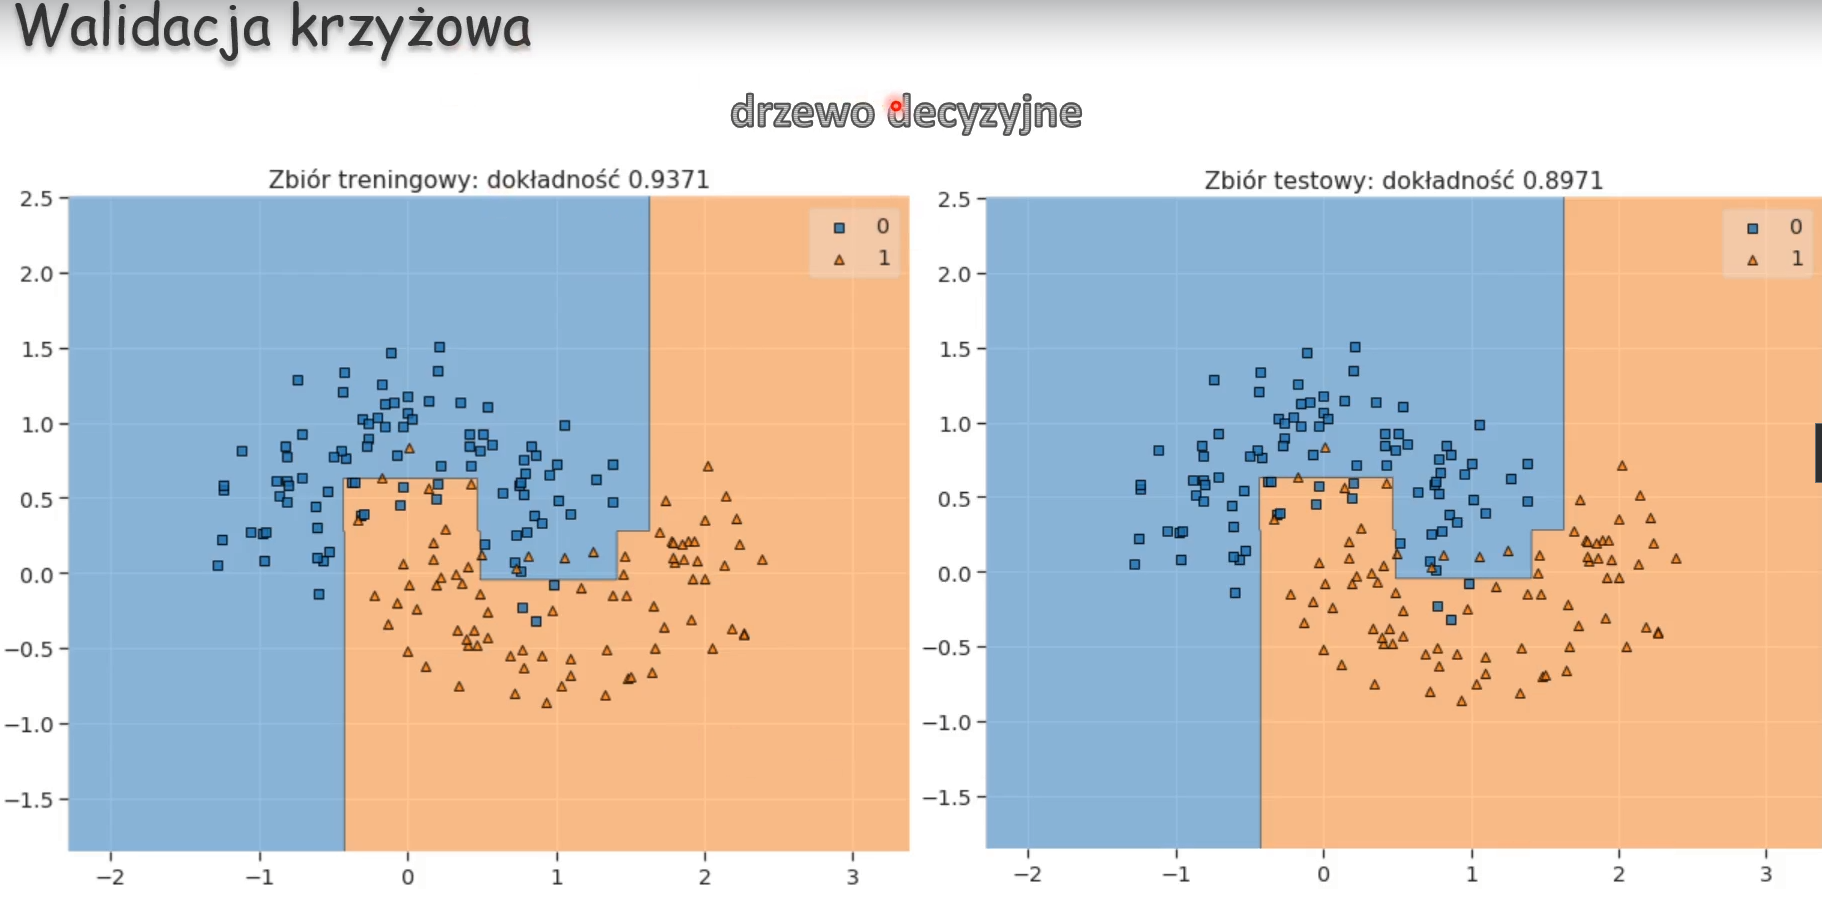

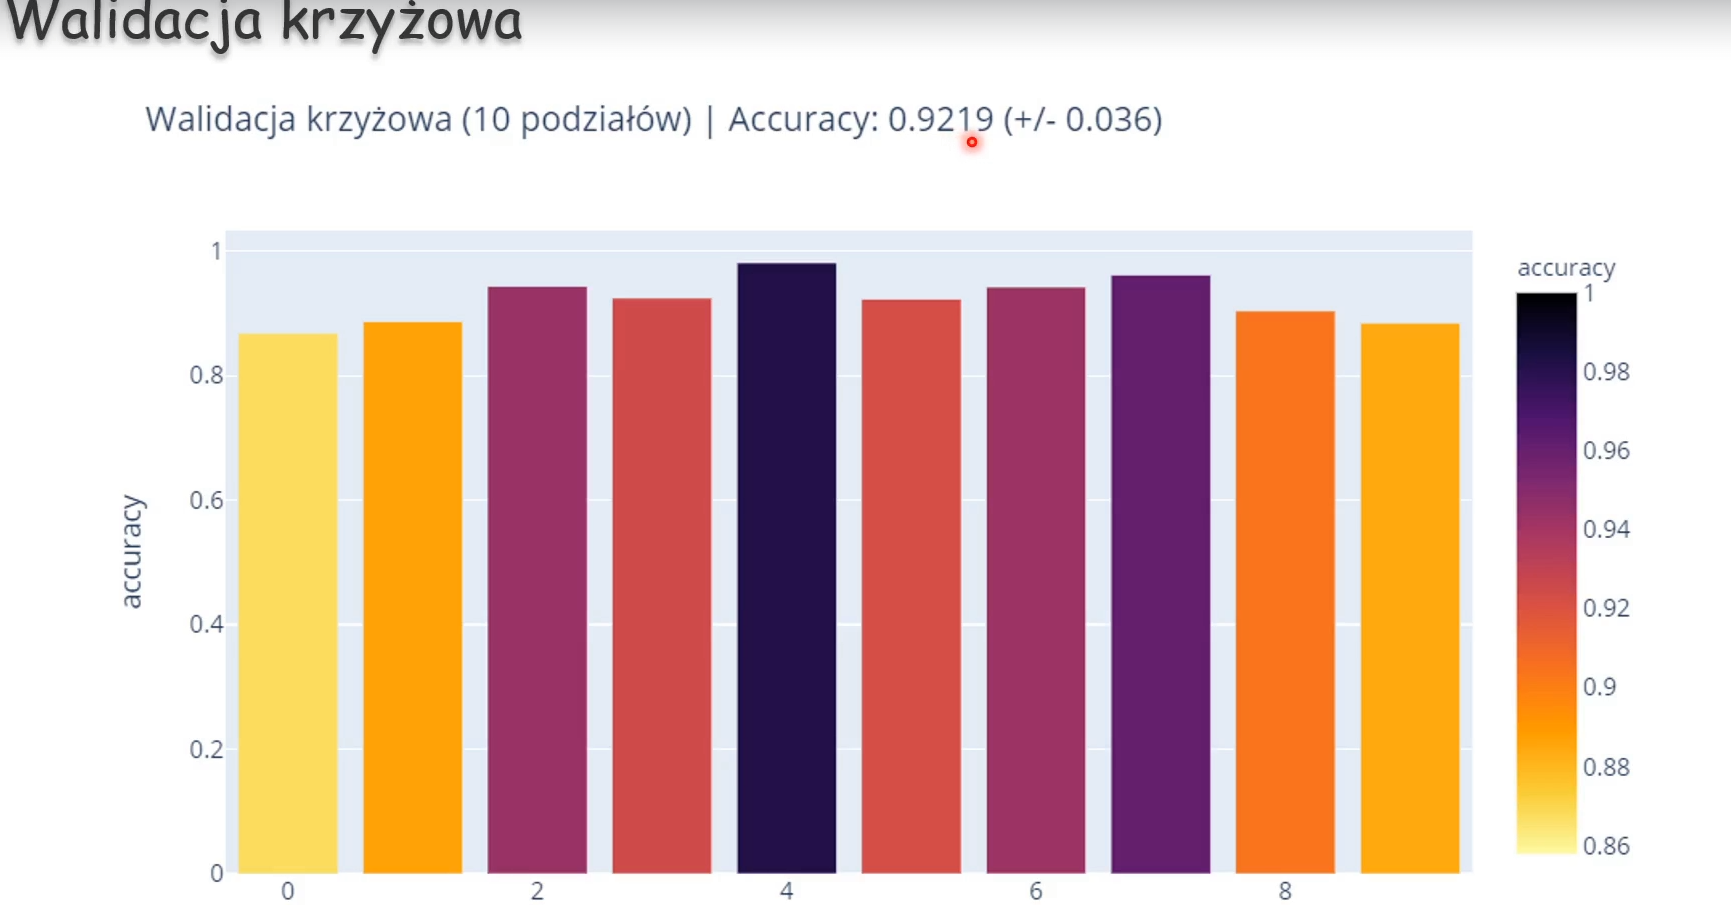

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px
np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
# wygenerowanie danych
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [3]:
df = pd.DataFrame(data=np.c_[data,target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


In [4]:
#wizualizacja danych
px.scatter(df, x='x1', y='x2', color='target', width=700, height=400)

In [5]:
#podział na zbiory
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1500, 2)
X_test shape: (500, 2)
y_train shape: (1500,)
y_test shape: (500,)


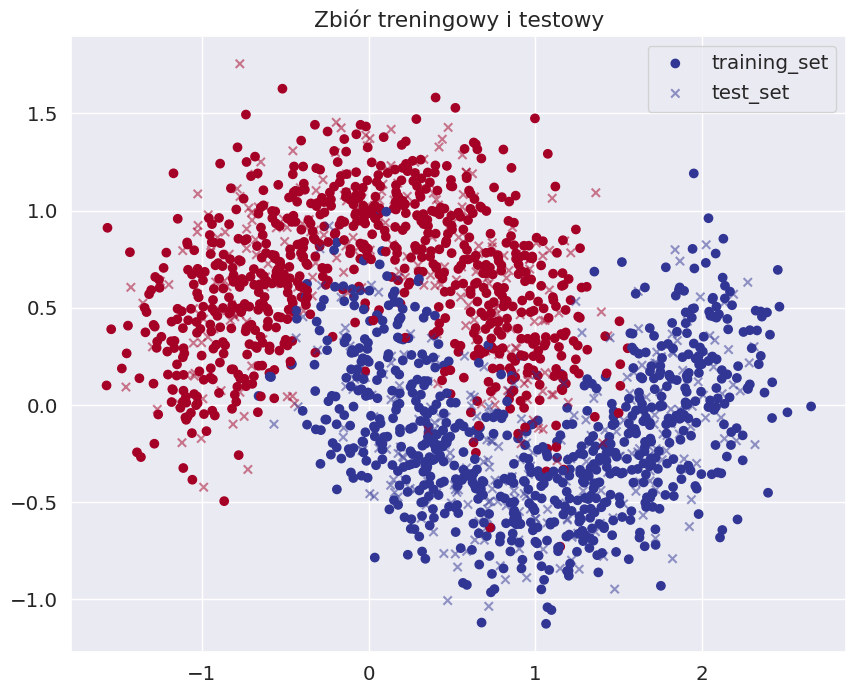

In [6]:
# wizualizacja zbioru treningowego i testowego

plt.figure(figsize=(10,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()


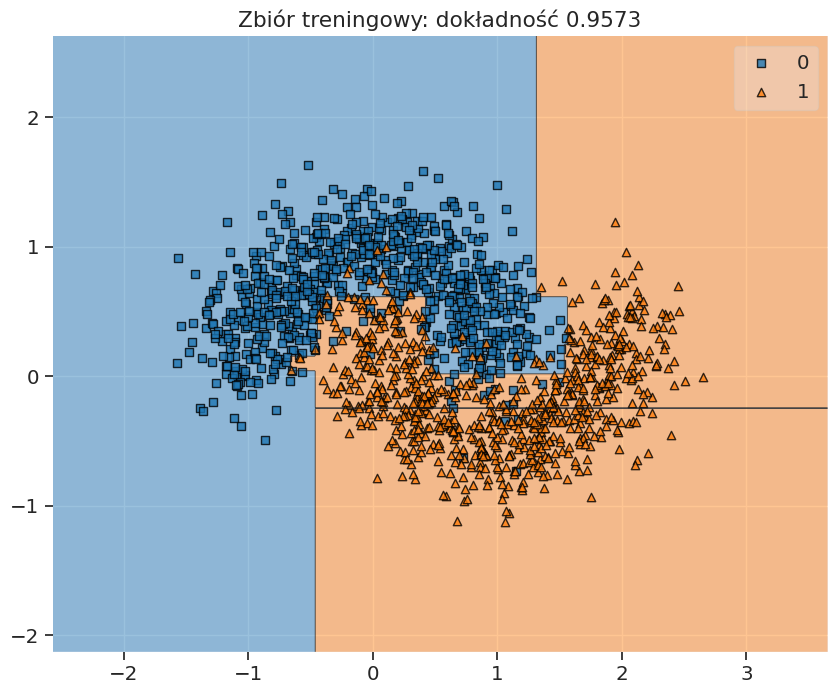

In [7]:
#Budowa modelu
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność { classifier.score(X_train, y_train):.4f}')
plt.show()

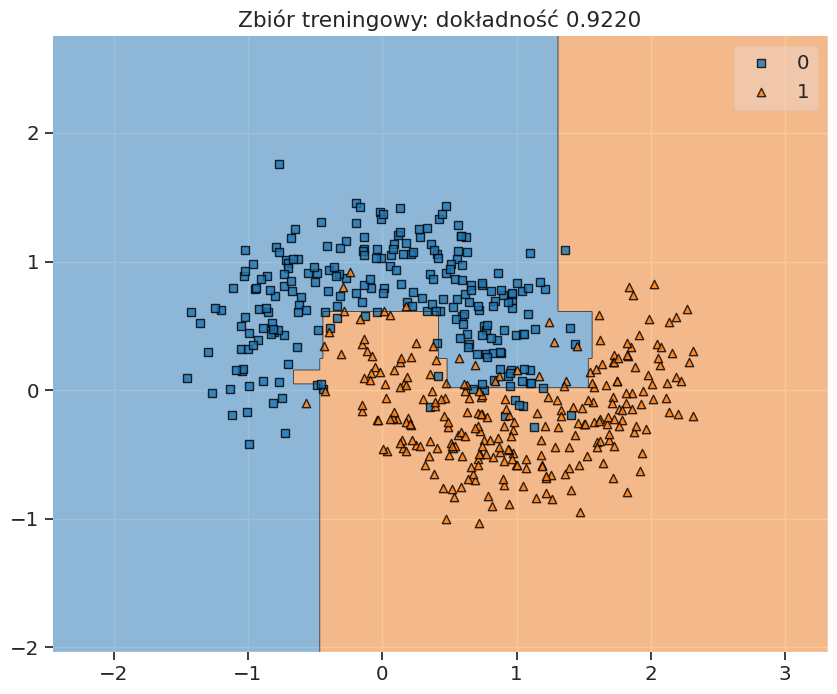

In [8]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór treningowy: dokładność { classifier.score(X_test, y_test):.4f}')
plt.show()

# Walidacja krzyżowa

In [10]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
scores

array([0.93333333, 0.94666667, 0.96      , 0.92666667, 0.95333333,
       0.94      , 0.96666667, 0.93333333, 0.94      , 0.95333333])

In [11]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9453 (+/- 0.0122)


In [12]:
classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=15)
scores

array([0.93, 0.93, 0.97, 0.96, 0.95, 0.92, 0.94, 0.96, 0.94, 0.98, 0.93,
       0.94, 0.93, 0.96, 0.94])

In [13]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9453 (+/- 0.0167)


In [14]:
#tworzymy DataFrame a scores
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.93
1,0.93
2,0.97
3,0.96
4,0.95
5,0.92
6,0.94
7,0.96
8,0.94
9,0.98


In [15]:
px.bar(scores, y='accuracy', color='accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (10 podziałów) | Accuracy : {scores.mean()[0]:.4f} (+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0]
       )